In [1]:
from perk_helper import ModCard, ModDeck
import numpy as np

In [2]:
md = ModDeck()
md.add_card(1, ModCard(damage_mod=1, rolling=True))
md.add_card(1, ModCard(damage_mod=2, rolling=True))

In [3]:
md.deck

[[(damage_mod, -2)],
 [(damage_mod, -1)],
 [(damage_mod, -1)],
 [(damage_mod, -1)],
 [(damage_mod, -1)],
 [(damage_mod, -1)],
 [(damage_mod, 0)],
 [(damage_mod, 0)],
 [(damage_mod, 0)],
 [(damage_mod, 0)],
 [(damage_mod, 0)],
 [(damage_mod, 0)],
 [(damage_mod, 1)],
 [(damage_mod, 1)],
 [(damage_mod, 1)],
 [(damage_mod, 1)],
 [(damage_mod, 1)],
 [(damage_mod, 2)],
 [(multiplier, 2), (damage_mod, 0)],
 [(multiplier, 0), (damage_mod, 0)],
 [(damage_mod, 1), (rolling, True)],
 [(damage_mod, 2), (rolling, True)]]

In [4]:
md.compute_rolls()
print(np.shape(md.rolls))
md.rolls

(100,)


[[[(damage_mod, -2)]],
 [[(damage_mod, -1)]],
 [[(damage_mod, -1)]],
 [[(damage_mod, -1)]],
 [[(damage_mod, -1)]],
 [[(damage_mod, -1)]],
 [[(damage_mod, 0)]],
 [[(damage_mod, 0)]],
 [[(damage_mod, 0)]],
 [[(damage_mod, 0)]],
 [[(damage_mod, 0)]],
 [[(damage_mod, 0)]],
 [[(damage_mod, 1)]],
 [[(damage_mod, 1)]],
 [[(damage_mod, 1)]],
 [[(damage_mod, 1)]],
 [[(damage_mod, 1)]],
 [[(damage_mod, 2)]],
 [[(multiplier, 2), (damage_mod, 0)]],
 [[(multiplier, 0), (damage_mod, 0)]],
 [[(damage_mod, 1), (rolling, True)], [(damage_mod, -2)]],
 [[(damage_mod, 1), (rolling, True)], [(damage_mod, -1)]],
 [[(damage_mod, 1), (rolling, True)], [(damage_mod, -1)]],
 [[(damage_mod, 1), (rolling, True)], [(damage_mod, -1)]],
 [[(damage_mod, 1), (rolling, True)], [(damage_mod, -1)]],
 [[(damage_mod, 1), (rolling, True)], [(damage_mod, -1)]],
 [[(damage_mod, 1), (rolling, True)], [(damage_mod, 0)]],
 [[(damage_mod, 1), (rolling, True)], [(damage_mod, 0)]],
 [[(damage_mod, 1), (rolling, True)], [(damage_mod

# old code to migrate

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def build_deck(curse_count=0, bless_count=0):
    # multiplier, additive factor, number of cards
    mod_cards = [(2, 0, 1+bless_count), (0, 0, 1+curse_count), (1, -2, 1), (1, -1, 5), (1, 0, 6), (1, 1, 5), (1, 2, 1)]
    deck = []
    for card in mod_cards:
        for _ in range(card[2]):
            deck.append((card[0], card[1]))
        
    return sorted(deck)

def attack(base, deck, muddle=False, strengthen=False):
    damages = []
    if muddle and not strengthen:
        for card0, card1 in combinations(deck, 2):
            dmg0 = base*card0[0] + card0[1]
            dmg1 = base*card1[0] + card1[1]
            dmg = np.min((dmg0, dmg1))
            damages.append(np.max((dmg, 0)))
    elif strengthen and not muddle:
        for card0, card1 in combinations(deck, 2):
            dmg0 = base*card0[0] + card0[1]
            dmg1 = base*card1[0] + card1[1]
            dmg = np.max((dmg0, dmg1))
            damages.append(np.max((dmg, 0)))
    else:
        for card in deck:
            damages.append(np.max((base*card[0] + card[1], 0)))
    return damages

In [6]:
attack_deck = build_deck()
print(attack_deck)

damage = attack(6, attack_deck, muddle=True)
print(damage, np.mean(damage))

damage = attack(6, attack_deck)
print(damage, np.mean(damage))

[(0, 0), (1, -2), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (2, 0)]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8] 4.931578947368421
[0, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 12] 6.0


Text(0, 0.5, 'Expected damage')

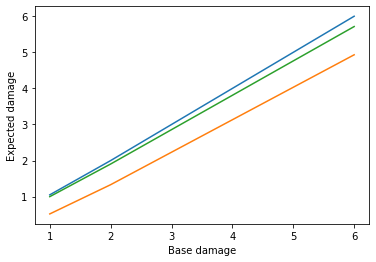

In [7]:
regular = []
muddle = []
curse = []
base = range(1, 7)
for i in base:
    damage = attack(i, attack_deck)
    regular.append(damage)
    damage = attack(i, attack_deck, muddle=True)
    muddle.append(damage)
    damage = attack(i, build_deck(curse_count=1))
    curse.append(damage)
    
plt.figure()
plt.plot(base, np.mean(regular, axis=1))
plt.plot(base, np.mean(muddle, axis=1))
plt.plot(base, np.mean(curse, axis=1))
plt.xlabel('Base damage')
plt.ylabel('Expected damage')

In [8]:
print(np.array(np.mean(regular, axis=1)) - np.array(np.mean(muddle, axis=1)))

[0.52894737 0.66842105 0.76842105 0.86842105 0.96842105 1.06842105]


In [9]:
print(np.array(np.mean(regular, axis=1)) - np.array(np.mean(curse, axis=1)))

[0.05       0.0952381  0.14285714 0.19047619 0.23809524 0.28571429]


Text(0, 0.5, 'Expected damage')

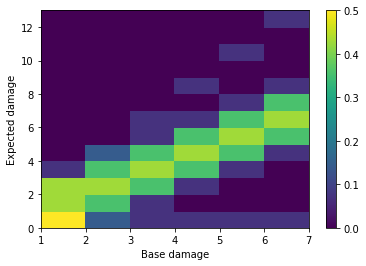

In [10]:
plt.figure()
x = np.linspace(1, 7, 7)
y = np.linspace(0, np.max(regular)+1, np.max(regular)+2)
z = []


for base_atk in regular:
    z.append(np.bincount(base_atk, minlength=len(y)))

z = np.array(z)
plot = plt.pcolormesh(x, y, z.T/len(y), linewidth=0, rasterized=True);
plt.xlim(1, 7)
plt.colorbar()
plt.xlabel('Base damage')
plt.ylabel('Expected damage')

strengthen vs bless